# An Analysis of the numpy.random Python Package (v 1.19)

***

NumPy is a Python package which enables the creation, manipulation and analysis of multi-dimensional arrays. As such, it is a key package for performing scientific computing within python [1].

A subset of the numpy package is numpy.random, which is used for the generation of pseudorandom number arrays based on defined parameters, and in some cases the stated probability distribution [2]. If the size of the array generated is sufficiently large, the plot of the array should mimic the distribution of the probability distribution used to generate the array. When a distribution is not specified, simple random data is generated.

When generating a random array, a seed is required in order to generate the pseudorandom numbers. This seed can be defined in order to ensure the array remains identical for each execution of the code. If the default seed is used, the generated numbers will be truly unpredictable, with varying results for each execution [3].

***


In [1]:
# importing the package for analysis
import numpy as np
# creating a variable with the default seed generator for ease of reference
rng = np.random.default_rng()
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Simple Random Data

*integers, random, choice and bytes*


***


#### Integers

Integers allows for 5 different parameters; high, low, dtype, size and endpoint. The output is an array of the defined size, filled with random integer values between the low and high values (including the low, excluding the high from the sample options). If undefined, the low has a default value of 0.

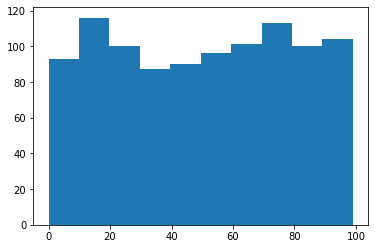

In [2]:
x1 = rng.integers(100, size=1000)
plt.hist(x1)
plt.show()

The above plot shows that the upper bound value of 100 is not included in the range of values included.

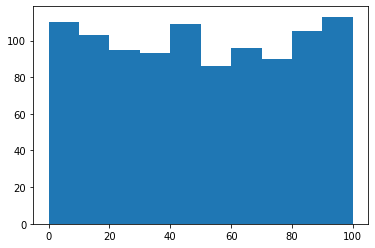

In [3]:
# testing the impact of the endpoint parameter
y1 = rng.integers(100, size=1000, endpoint=True)
plt.hist(y1)
plt.show()

As evidenced within the above plot, by changing endpoint from the default of False to True, the high value is now included in the range of integers to be randomly sampled.

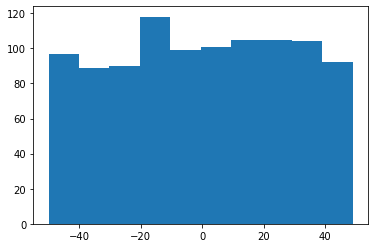

In [4]:
# investigating whether negative values can be included by specifying the low value
z1 = rng.integers(low=-50, high=50, size=1000)
plt.hist(z1)
plt.show()

When the low value is not specified, it is assumed as 0, but it will allow a user input to allow for negative integers, or increase the lower bound as required

***

#### Random

Random takes in up to 3 parameters; size, dtype, and out

In [5]:
# when no parameters are passed, a random number between 0 and 1 is returned
w2 = rng.random()
w2

0.29092476260492384

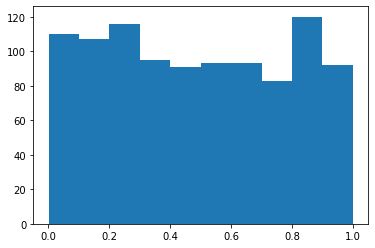

In [6]:
x2 = rng.random(1000)
plt.hist(x2)
plt.show()

when a single parameter is entered, numpy assumes it is a size parameter, resulting in the above graph with 1000 random numbers between 0 and 1

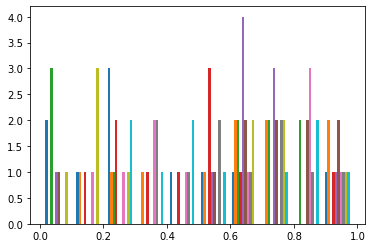

In [7]:
# can specify output type instead of size, to get arrays of a set size, rather than 1 array
y2 = rng.random((10,10))
plt.hist(y2)
plt.show()

the output is 10 arrays of size 10; numpy has used 10 colours to represent the values in each of the 10 arrays

***

#### Choice

choice accepts 6 parameters; a, size, replace, p, axis and shuffle.

_a:_ this can be either an array, or a single positive integer, which provides the pool from which the random sample is generated. If a is a single figure, the selection range will be all the integers from 0 to a (excluding a). This array does not have to be numeric.

_size:_ defines the size of the output. If the replace parameter is set to _False_, then size must be less than or equal to the size of _a_

_replace:_ defines whether, once a value has been randomly selected, if it can be selected again. By default, this value is set to True. If set to False, each value can be selected at most once.

_p:_ this parameter allows the user to define varying probabilities for selection to the values in the selection pool; thus, if defined, it must be equal in size to a. By default, the probability of selecting any number is equal.

_axis:_ for multidimensional input arrays, the axis parameter defines the position in these arrays from which to sample. if a 1D array, or single integer value, is defined for a, then a change to this parameter should have no impact on the random selection.

_shuffle:_ intuitively, this parameter defines whether the input data is shuffled between selections. This is only applicable when replace is set to False. By setting this parameter to False, the function will execute at a quicker rate, which may be beneficial for large input sizes.

The most complex function within the simple random data section of numpy.random, choice mirrors permutations and combinations, depending on the value assigned to the 'replace' parameter.

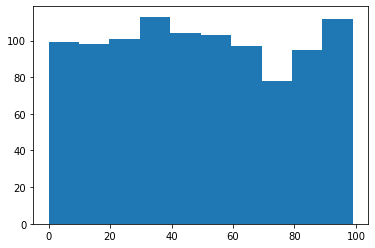

In [8]:
x3 = rng.choice(100,size=1000,replace=True)
# attempting to run this with replace=False will cause an error, as the number of selections to be made exceeds the numbers to be chosen from.
plt.hist(x3)
plt.show()

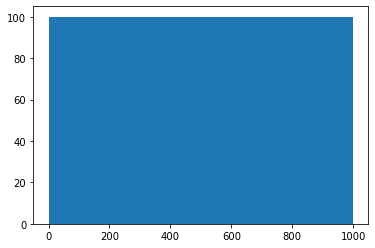

In [9]:
y3 = rng.choice(1000,size=1000,replace=False)
plt.hist(y3)
plt.show()

Without replacement, when the selection pool and sample size are equal, each value is returned exactly once. While this appears redundant when plotted on a histogram, the order of the output array would prove useful if, for example, you wished to randomly assign a unique number to 1000 individuals in order to maintain anonymity.

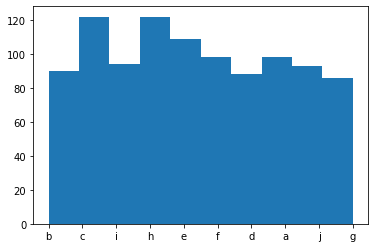

In [10]:
z3 = rng.choice(['a','b','c','d','e','f','g','h','i','j'],size=1000)
plt.hist(z3)
plt.show()

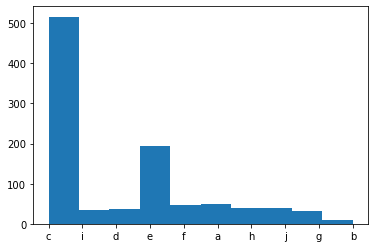

In [11]:
w3 = rng.choice(['a','b','c','d','e','f','g','h','i','j'],size=1000,p=[0.05,0.01,0.5,0.04,0.2,0.04,0.04,0.04,0.04,0.04])
plt.hist(w3)
plt.show()

As shown by the histograms of z3 and w3 above, assigning a probability weighting to the selection array has a significant influence on the selection. z3, where the values have been assigned equal probabilities of selection, appears to be graduating towards a uniform distribution, as expected. w3, by comparison, has a very high frequency of c, as expected by the 0.5 probability assigned to that value.

***

#### Bytes

Bytes takes only 1 input parameter; length. This defines the size of the output.

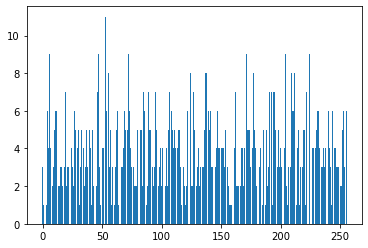

In [12]:
x4 = rng.bytes(1000)
#because the data is not numeric, cannot be plotted as a histogram
#instead I will use a barchart, to allow for a measure of comparison with the previous histograms
height = []
for i in x4:
    if i not in height:
        height.append(i)
count = np.zeros(len(height))
for j in x4:
    for k in range(len(height)):
        if j == height[k-1]:
            count[k-1] += 1

plt.bar(height,count)
plt.show()

***

## Permutations

*shuffle and permutation*

The shuffle and permutation functions have a lot in common; both have the same 2 input parameters - an ndarray to be rearranged, and an optional axis parameter - and at first glance, appear to produce the same format. In practice, there are two key differences between shuffle and permutation [4]:

 - permutation creates a rearranged _copy_ of the input array, whereas shuffle directly rearranges the input array. This property isn't evident when the input array is directly input within the function. However, if a predefined array x is used for the input, running the permutation function with input x has no effect on the variable x in itself; inputting x to the shuffle function will overwrite the variable with the shuffled array. Thus, if the original input needs to be maintained, the permutation function should be used.
 
 - if an integer value is used as the input for the function, shuffle will return an error, while permutation will rearrange a 1D-array of integer values from zero up to the the value below the input number

In [13]:
# defining 2 identical arrays, to compare how they are treated by both the permutation and shuffle functions
a1 = np.arange(10)
a2 = np.arange(10)

In [14]:
a1

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [15]:
a2

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

The above outputs show that, before using the arrays as inputs to a function, they are identical. 

In [16]:
a1_perm = rng.permutation(a1)

In [17]:
a1

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [18]:
a1_perm

array([3, 9, 1, 6, 7, 8, 2, 4, 0, 5])

After using a1 as the input to the permutation function, it remains as it was initially deinfed, and the new variable is assigned the rearranged copy produced by the permutation function

In [19]:
a2_shuf = rng.shuffle(a2)

In [20]:
a2

array([4, 2, 6, 1, 3, 7, 5, 8, 0, 9])

In [21]:
a2_shuf

In contrast, the valueas within the a2 array have been reordered following their use within the shuffle function, and as there is no new output from the shuffle function, the variable a2_shuf has no value.

In [22]:
rng.permutation(10)
# this will return an error if shuffle is used instead of permutation

array([6, 4, 3, 8, 5, 2, 1, 0, 7, 9])

In [23]:
a3 = [[0,1,2],[3,4,5],[6,7,8]]
rng.permutation(a3)

array([[3, 4, 5],
       [0, 1, 2],
       [6, 7, 8]])

In [24]:
rng.permutation(a3,axis=1)

array([[1, 2, 0],
       [4, 5, 3],
       [7, 8, 6]])

When a 2D array is used as the input, the definition of the axis parameter affects how the data is rearranged. The default value of axis=0 will permutate the order of the subarrays without rearranging the values within each subarray. By contrast, when axis is set to 1, the order of the sub arrays remain unchanged, while the values within each subarray are rearranged.

From multiple runs of the above cell, it is clear that the same rearrangement is performed for all subarrays of the input.

***

## Distributions

*binomial, exponential, normal, poisson and uniform*

A probability distribution is a mathematical function which gives the probability of an outcome in a given experiment [5]. The shape of a probability distribution varies depending on the event under investigation.

A probability distribution can be either discrete or continuous. A discrete distribution has a finite set of outcomes; often integers, though not always. A continuous distribution has an infinite number of outcomes; probabilities are calculated across a range of values, as the probability of getting a specific value in a continuous distribution is always zero.

***

#### Binomial Distribution

The binomial distribution relates to an event with teo possible outcomes; success or failure. A common example of an event which follows a binomial distribution is the tossing of a coin.

The parameters which can be input to the binomial function are as follows:

 - n: this is the number of times the event is repeated for each occurence. If n=10, then each iteration of the binomial function involves flipping a coin 10 times.
 - p: this is the probability of a success. As there are only 2 outcomes, the probability of failure is then (1-p). p=0.5 when tossing a coin, regardless of whether heads or tails is considered a success.
 - size: this is an optional parameter which defines how many iterations of the binomial function will run. If this is not defined, the function will return a single value.
 
The output of the binomial function will be a single integer value (or an array of integer values). In the context of tossing a coin, this integer corresponds to the number of, say, heads obtained when the coin was tossed n times.

Intuitively, I would expect that a low probability would result in a higher number of low outcomes, while conversely if the probability is high then the results would be skewed towards the upper values in the range of outcomes.

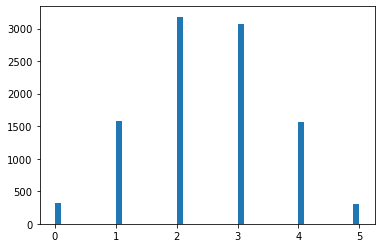

In [25]:
# visualising the distribution with equal probabilities of success failure
b_dist1 = rng.binomial(5,0.5,size=10000)
sns.distplot(b_dist1,kde=False,hist_kws={"linewidth": 15,'alpha':1})

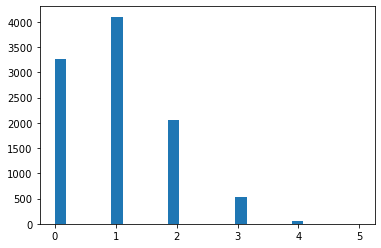

In [26]:
# investigating the impact of a lower probability of success
b_dist2 = rng.binomial(5,0.2,size=10000)
sns.distplot(b_dist2,kde=False,hist_kws={"linewidth": 15,'alpha':1})

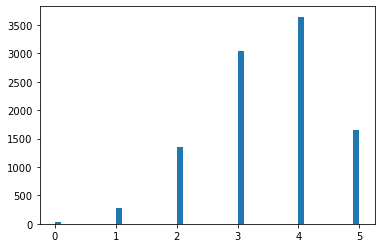

In [27]:
# testing a higher probability for comparison
b_dist3 = rng.binomial(5,0.7,size=10000)
sns.distplot(b_dist3,kde=False,hist_kws={"linewidth": 15,'alpha':1})

The shapes of the above 3 plots align with my expectations; when the probability is 0.5 the results are centred, whereas when the probability of success is lower and higher than the probability of failure the plot is skewed right and left respectively.

***

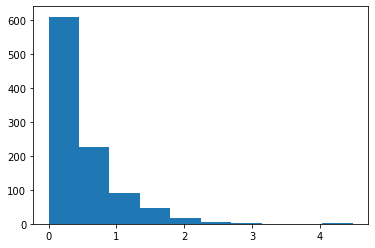

In [28]:
e_dist = rng.exponential(0.5,size=1000)
plt.hist(e_dist)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

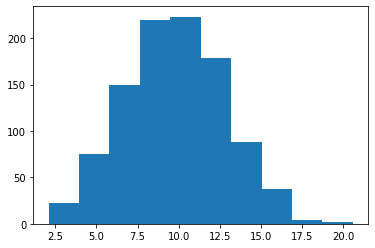

In [29]:
n_dist = rng.normal(loc=10,scale=3,size=1000)
plt.hist(n_dist)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

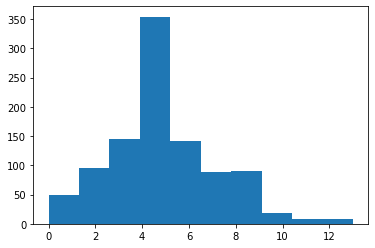

In [30]:
p_dist = rng.poisson(lam=5,size=1000)
plt.hist(p_dist)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

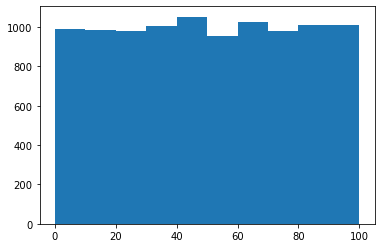

In [31]:
u_dist = rng.uniform(low=0,high=100,size=10000)
plt.hist(u_dist)
plt.show

## Seeds

###### References
[1] Python NumPy; GeeksForGeeks; https://www.geeksforgeeks.org/python-numpy/

[2] Random sampling (numpy.random); NumPy; https://numpy.org/doc/stable/reference/random/index.html

[3] Random Generator; NumPy; https://numpy.org/doc/stable/reference/random/generator.html

[4] Shuffle vs. Permute Numpy; ecatmur; https://stackoverflow.com/questions/15474159/shuffle-vs-permute-numpy

[5] Probability Distribution; Wikipedia; https://en.wikipedia.org/wiki/Probability_distribution